In [16]:
import sys
import os
import pathlib
import glob
from importlib import reload
# from imp import reload 
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from dateutil import parser
# from datetime import datetime, timedelta

import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [17]:
%load_ext autoreload
%autoreload 2

from helper_functions import epa_taiwan_data_pipeline

<module 'helper_functions.epa_taiwan_data_pipeline' from 'd:\\0_amri_local\\11_aqi_forecast\\notebooks\\helper_functions\\epa_taiwan_data_pipeline.py'>

In [18]:
root_dir = pathlib.Path(os.getcwd()).parent
raw_data_dir = root_dir / "data/0_raw"
processed_data_dir = root_dir / "data/1_processed"
experiment_dir = root_dir / "experiment"

# Data Loading and Preprocessing

- Import the data
- Preprocess the data
- Turn the data into tensor

In [23]:
year = 2018
site_name = "Banqiao"
columns = None
# columns = ["SiteEngName","PM2.5","AMB_TEMP","CH4",'CO',"NMHC","read_time"]

# import data
pm25_df = epa_taiwan_data_pipeline.import_epa_data(site_name=site_name, year=year)

# basic preprocessing
# pm25_df = epa_taiwan_data_pipeline.standardize_df(pm25_df)

In [24]:
pm25_df.head()

,SiteEngName,PM2.5,AMB_TEMP,CH4,CO,NMHC,read_time
1,Banqiao,20.0,16.1,1.9,0.37,0.07,2018/1/1 00:00:00
77,Banqiao,19.0,16.2,1.9,0.37,0.08,2018/1/1 01:00:00
153,Banqiao,17.0,16.3,1.9,0.31,0.05,2018/1/1 02:00:00
229,Banqiao,17.0,16.3,1.9,0.28,0.05,2018/1/1 03:00:00
305,Banqiao,16.0,16.5,1.9,0.27,0.05,2018/1/1 04:00:00


# Plot

We want to see through the plots if there's any noticable pattern on our data

### Scatter with regression

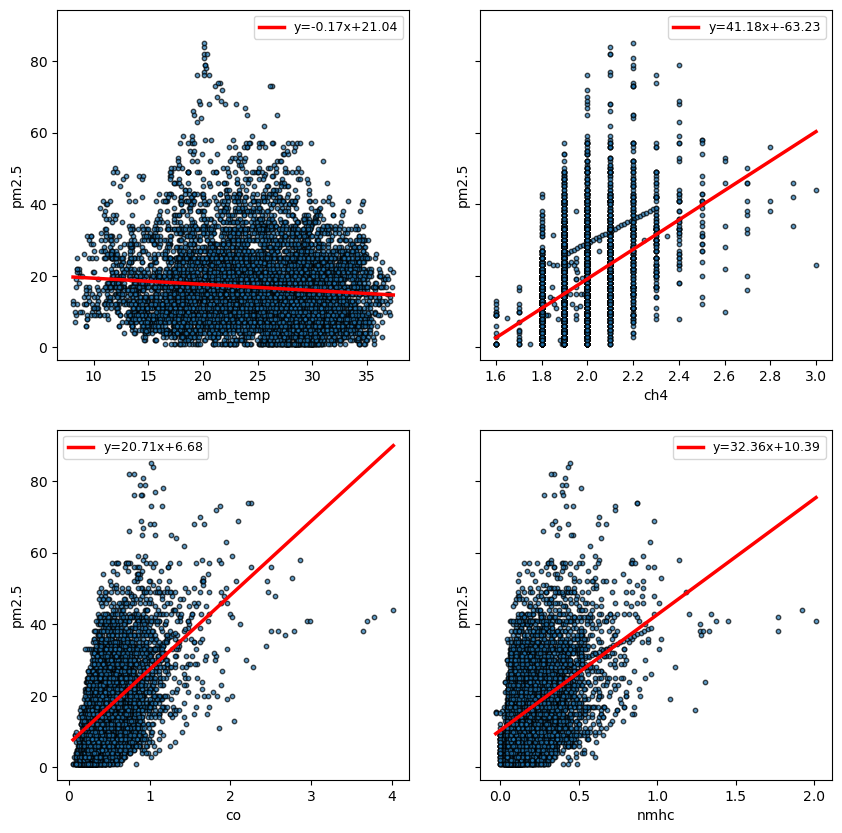

In [44]:
# Initialize layout
fig, axs = plt.subplots(2,2,figsize = (10, 10), sharey=True)

for col, ax in zip(pm25_df.columns[2:-1], axs.flatten()):
    x = pm25_df[col]
    y = pm25_df['pm2.5']

    # Add scatterplot
    ax.scatter(x, y, s=10, alpha=0.7, edgecolors="k")
    ax.set_xlabel(f"{col}")
    ax.set_ylabel('pm2.5')

    # Fit linear regression via least squares with numpy.polyfit
    # It returns an slope (b) and intercept (a)
    # deg=1 means linear fit (i.e. polynomial of degree 1)
    slope, intercept = np.polyfit(x, y, deg=1)

    # Create sequence of 100 numbers from 0 to 100 
    xseq = np.linspace(min(x), max(x))

    # Plot regression line
    ax.plot(
        xseq, 
        slope * xseq + intercept, 
        color="red", 
        lw=2.5,
        label='y={:.2f}x+{:.2f}'.format(slope,intercept)
        )
    ax.legend(fontsize=9)

### Overall Plot

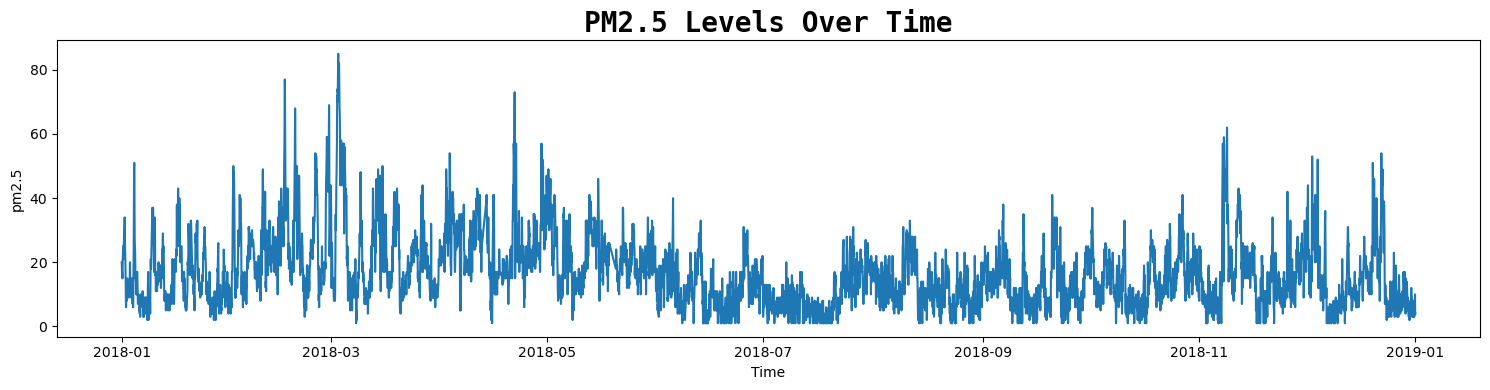

In [ ]:
# col_to_plot = pm25_df.columns[1:-1]
col_to_plot = [pm25_df.columns[1]]

nrow = len(col_to_plot)
ncols = 1

fig, ax = plt.subplots(
    nrow,
    ncols,
    figsize = (15,4*nrow)
    )

try:
    for col, ax in zip(col_to_plot, ax.flatten()):
        ax.plot(
            pm25_df['read_time'], 
            pm25_df[col],
            linestyle='-',
            )
        ax.set_title(f'{col.upper()} Levels Over Time', fontweight = "bold", fontsize = 20, fontfamily = "monospace")
        ax.set_xlabel('Time')
        ax.set_ylabel(f'{col}')
except:
    ax.plot(
        pm25_df['read_time'], 
        pm25_df[col_to_plot[0]],
        linestyle='-',
        )
    ax.set_title(f'{col_to_plot[0].upper()} Levels Over Time', fontweight = "bold", fontsize = 20, fontfamily = "monospace")
    ax.set_xlabel('Time')
    ax.set_ylabel(f'{col_to_plot[0]}')
    
plt.tight_layout()

### Daily Plot

In [ ]:
# pm25_df["read_time"].dt.date.unique()

In [ ]:
# col_to_plot = pm25_df.columns[1:-1]
col_to_plot = [pm25_df.columns[1]]

nrow = len(col_to_plot)
ncols = 1

fig, ax = plt.subplots(
    nrow,
    ncols,
    figsize = (15,4*nrow)
    )

start_date = 
end_date = 

try:
    for col, ax in zip(col_to_plot, ax.flatten()):
        ax.plot(
            pm25_df['read_time'], 
            pm25_df[col],
            linestyle='-',
            )
        ax.set_title(f'{col.upper()} Levels Over Time', fontweight = "bold", fontsize = 20, fontfamily = "monospace")
        ax.set_xlabel('Time')
        ax.set_ylabel(f'{col}')
except:
    ax.plot(
        pm25_df['read_time'], 
        pm25_df[col_to_plot[0]],
        linestyle='-',
        )
    ax.set_title(f'{col_to_plot[0].upper()} Levels Over Time', fontweight = "bold", fontsize = 20, fontfamily = "monospace")
    ax.set_xlabel('Time')
    ax.set_ylabel(f'{col_to_plot[0]}')
    
plt.tight_layout()

### Weekly Plot

### Monthly Plot